# LAB 08 - Ethical Issues with Driverless Vehicles  
**COMP130 - Introduction to Computing**  
**Dickinson College**  


### Names:

Solutions

## Introduction:

Most automobile manufacturers and many technology companies have been working on bringing driverless vehicles to the roads for many years now.  These vehicles hold the promise to dramatically decrease road congestion while also significantly reducing the number and severity of accidents. With these benefits comes the challenge of programming the vehicles to make ethical decisions in difficult situations that involve inevitable harm.  In this lab you will identify some of the factors that might go into those decisions and explore the social ramifications of how these decisions are made.

## Pre-Lab Preparation:

Before coming to lab watch the video and read the article [Should Your Driverless Car Hit a Pedestrian to Save Your Life?](https://www.nytimes.com/2016/06/24/technology/should-your-driverless-car-hit-a-pedestrian-to-save-your-life.html)

[![Driverless Car](https://static01.nyt.com/images/2016/06/22/multimedia/autonomous-cars-ethics/autonomous-cars-ethics-mediumThreeByTwo440.jpg)](https://www.nytimes.com/2016/06/24/technology/should-your-driverless-car-hit-a-pedestrian-to-save-your-life.html)

## Preliminary Questions:

**Q1:** State and briefly explain the ethical principle proposed by Jeremy Bentham?

Jeremy Bentham's ethical principle is called Utilitarianism and it holds that the ethical action is the one the produces the most good for the most people, or in his words "the greatest good for the greatest number".

**Q2:** What does that principle suggest that a driverless car should do when faced with situation that involves inevitable harm? 

The Utilitarian principle suggests that the car should take the action the takes the least lives or causes the least harm.

**Q3:** State and briefly explain the ethical principle proposed by Immanuel Kant?

Kant's ethical principle is called the The Categorical Imperative and it says that "the right is superior to the good."  This suggests that there are moral absolutes that must be obeyed even if the outcome in a given scenario is not what you might imagine is best.

**Q4:** What does that ethical principle suggest that a driverless car should do when faced with a situation involving inevitable harm?

Kant's principle suggests that the car must take no action, because taking an action would be a decision that takes a life and it is wrong to take a life.  Of course there those that argue, in the words of the [rock band Rush](https://www.youtube.com/watch?v=OnxkfLe4G74) that "if you choose not to decide you sill have made a choice."

**Q5:** Consider the following four factors that might be considered when programming the behavior of a driverless car:

- Saving more lives
- Protecting passengers
- Upholding the law
- Avoiding Intervention

Which of these factors are most consistent with Bentham's principle? Explain.

- Saving more lives - more lives saved is "more good for more people"
- Protecting passengers - in the event that it does not cost more lives, protecting the passengers will save more lives.

**Q6:** Are the factors you did not consider in Q5 consistent with Kant's principle? Explain.

- Upholding the law - this fits the "right is superior to the good" idea with the notion that following the law is the right thing to do.
- Avoiding Intervention - this also fits with the interpretation of Kant's principle that taking an action that causes harm is wrong, even if taking no action causes harm.

## Activity:

The [Moral Machine](http://moralmachine.mit.edu/) is a site created by the researchers from the above videos to gather "a human perspective on moral decisions made by machine intelligence, such as self-driving cars." The site presents a series of scenarios, like the one shown below in which there is inevitable harm and asks you what action a self-driving car should take in each. It then provides some summary information indicating what factors seemed to most influence your decisions. 

[![The Moral Machine](moralmachine.jpg)](http://moralmachine.mit.edu/)

**Q7:** With your lab partner, use the Moral Machine site to judge a set of scenarios. Briefly describe any general rules that you and your partner used when judging the scenarios.

_Individual responses will vary._

**Q8:** After you complete a set of scenarios The Moral Machine will indicate how much each of four factors from __Q5__ seem to matter in your judgments. Based on your results, list the four factors in order from _Mattered Most_ to _Mattered Least_.

_Individual responses will vary._

**Q9:** Does the order of your list in **Q8** align more with Bentham or with Kant? Justify your answer.

_Individual responses will vary._

## Modeling Scenarios:

It is one thing for us as individuals to make judgments as you did with the Moral Machine, it is another to program those decisions into vehicles that will affect large numbers of people. Eventually we will be using Monte-Carlo simulations to explore the impact of encoding different ethical values into driverless cars. In order to do that we will need to model the scenarios that a driverless car might encounter.

To do so this lab provides a module named `autonomous_vehicles` that contains an object named `Scenario`.  The `Scenario` object encapsulates information about the scenarios that our simulated self-driving cars will encounter. In particular it contains information about:
- The number of passengers in the car.
- The state of the left and right lanes including:
  - whether a barrier exists in the lane.
  - the number of pedestrians that will be killed if the car is in that lane.
  - whether the pedestrian crossing signal for that lane is on or off.

For the purposes of our simulations we will identify the lanes as left or right from the observer's perspective.  That is, in the images above the car and the barrier are in the left lane and the pedestrians are in the right lane.

The code cell below imports the `autonomous_vehicles` module, creates a `Scenario` object and then outputs the result of calling each of the methods that the object supports. 

In [3]:
import autonomous_vehicles as av

s = av.Scenario(3, True, 0, False, False, 5, True)

print ("Passengers: " + str(s.num_passengers()))
print ("Left Lane:")
print ("  Barrier exits:      " + str(s.left_barrier_exists()))
print ("  Pedestrians:        " + str(s.left_num_pedestrians()))
print ("  Crossing signal on: " + str(s.left_crossing_signal_on()))
print ("Right Lane:")
print ("  Barrier exists:     " + str(s.right_barrier_exists()))
print ("  Pedestrians:        " + str(s.right_num_pedestrians()))
print ("  Crossing signal on: " + str(s.right_crossing_signal_on()))

Passengers: 3
Left Lane:
  Barrier exits:      True
  Pedestrians:        0
  Crossing signal on: False
Right Lane:
  Barrier exists:     False
  Pedestrians:        5
  Crossing signal on: True


**Q10:** Run the code in the above cell.  What do each of the parameters to the `Scenario` constructor indicate?

The parameters in order indicate:
- The number of passengers in the car.
- If a barrier exists (`True`) or not (`False`) in the left lane.
- The number of pedestrians in the left lane
- Whether the crossing signal is on (`True`) or not (`False`) in the left lane.
- The final 3 parameters repeat the previous 3 but for the right lane.

**Q11:** In the cell below, give a statement that constructs a `Scenario` object representing the scene shown in the Moral Machine image above?

In [4]:
s = av.Scenario(5, True, 0, False, False, 2, False)

In order to perform Monte-Carlo simulations we will need to have lots of different scenarios.  To facilitate this the  `Scenario` class has a method named `randomize()`.  This method randomizes the values in a `Scenario` object. The `randomize()` method also ensures that the the object is consistent (e.g. if there is a barrier there will not be any pedestrians, etc.).

In [93]:
s.randomize()

print ("Passengers: " + str(s.num_passengers()))
print ("Left Lane:")
print ("  Barrier exits:      " + str(s.left_barrier_exists()))
print ("  Pedestrians:        " + str(s.left_num_pedestrians()))
print ("  Crossing signal on: " + str(s.left_crossing_signal_on()))
print ("Right Lane:")
print ("  Barrier exists:     " + str(s.right_barrier_exists()))
print ("  Pedestrians:        " + str(s.right_num_pedestrians()))
print ("  Crossing signal on: " + str(s.right_crossing_signal_on()))

Passengers: 3
Left Lane:
  Barrier exits:      False
  Pedestrians:        1
  Crossing signal on: True
Right Lane:
  Barrier exists:     True
  Pedestrians:        0
  Crossing signal on: False


**Q12:** Run the code in the above cell over and over again. What are the smallest and largest numbers of passengers and pedestrians that appear?

- From 1 to 5 passengers appear.
- From 0 to 7 pedestrians appear.

**Q13:** Are there ever pedestrians in a lane when there is a barrier in that lane?

No, if there is a barrier in a lane there will always be 0 pedestrians in that lane.

**Q14:** Does a `Scenario` ever occur in which there is a barrier in both lanes?

No, there are no `Scenario`s in which there are barriers in both lanes.

## Encoding Ethics

Now that we have a way to model scenarios, you will write code to simulate the decisions a driverless car might make based on different ethical principles.

### A Selfish Car

**Q15:** In the cell below define a function that controls the car so that it preserves the passenger's lives at all cost.  This function accepts a _Scenario_ object and returns either the string `"Stay"` or the string `"Swerve"` indicating if the car should stay in its lane or swerve into the other lane.  The function should assume that the car is in the left lane. 

In [7]:
def selfish_car(s):
    if (s.left_barrier_exists()):  # Barrier on left so not one on the right.
        return "Swerve"
    else:
        return "Stay"  # Could do either if no barriers. 

The cell below contains a test that partially checks that your function is working correctly.

In [3]:
import autonomous_vehicles as av

s = av.Scenario(3, False, 5, True, True, 0, True)
assert selfish_car(s) == "Stay", "Swerved but should have stayed."
print("Success!")

Success!


**Q16:** In the cell below add a test for another `Scenario` that tests the "Swerve" behavior of your selfish car.

In [95]:
s = av.Scenario(3, True, 0, True, False, 6, True)
assert selfish_car(s) == "Swerve", "Stayed but should have swerved."
print("Success!")

Success!


### A Utilitarian Car

Next you will be writing a function that makes decisions based on Bentham's utilitarian principle. Because this principle will choose the option with the fewest fatalities we will need to be able to compare the number of fatalities that occur when the car "Stays" and when it "Swerves."  So thinking ahead, its not hard to imagine that a function could help us with that.  So we'll make use of functional decomposition here and create a function that evaluates a `Scenario` and returns the number of fatalities that will occur.

**Q17:** In the cell below define a function that accepts two parameters: 
- a string, which will be `"Left"` or `"Right"`, indicating the lane that the car is in, and
- a `Scenario` object, which describes the scenario.

Your function should return the number of fatalities that would occur in the `Scenario` if the car is in the specified lane..

In [8]:
def num_fatalities(lane, s):
    if (lane == "Left"):
        if (s.left_barrier_exists()):
            return s.num_passengers()
        else:
            return s.left_num_pedestrians()
    else:
        if (s.right_barrier_exists()):
            return s.num_passengers()
        else:
            return s.right_num_pedestrians()

**Q18:** In the cell below, write a collection of tests that demonstrate that your function is working correctly.  To test the function thoroughly your function should achieve *statement coverage*. Note: You may use the same `Scenario` in more than one `assert`.

In [96]:
s = av.Scenario(3, False, 5, True, False, 6, True)
assert num_fatalities("Left", s) == 5, "Incorrect number of fatalities."
assert num_fatalities("Right", s) == 6, "Incorrect number of fatalities."

s = av.Scenario(3, True, 0, False, True, 0, False)
assert num_fatalities("Left", s) == 3, "Incorrect number of fatalities."
assert num_fatalities("Right", s) == 3, "Incorrect number of fatalities."
print("Success!")

Success!


**Q19:** In the cell below define a function that controls the car according to Bentham's utilitarian ethical principle.  This function accepts a `Scenario` object and returns either the string `"Stay"` or the string `"Swerve"` indicating if the car should stay in its lane or swerve into the other lane.  The function should assume that the car is in the left lane. 

In [9]:
def utilitarian_car(s):
    stay_count = num_fatalities("Left", s)
    swerve_count = num_fatalities("Right", s)   
    if (stay_count <= swerve_count):  # Note tie can go either way
        return "Stay"
    else:
        return "Swerve"

**Q20:** In the cell below, write a collection of tests that demonstrate that your function behaves correctly in a variety is situations.

In [97]:
s = av.Scenario(3, False, 5, True, False, 2, True)
assert utilitarian_car(s) == "Swerve", "Stayed but should have swerved."
s = av.Scenario(3, False, 2, True, False, 5, True)
assert utilitarian_car(s) == "Stay", "Swerved but should have stayed."
s = av.Scenario(3, True, 0, True, False, 7, True)
assert utilitarian_car(s) == "Stay", "Swerved but should have stayed."
s = av.Scenario(3, False, 5, True, True, 0, True)
assert utilitarian_car(s) == "Swerve", "Stayed but should have swerved."
print("Success!")

Success!


### A Kantian Car

**Q21:** One interpretation (there are others) of Kant's ethical principle in the context of an autonomous car is that the car may never take an action that causes a fatality. As you have seen, there are scenarios in which there is no course of action that will avoid all fatalities. What must a car following Kant's ethical principle do in such a scenario?

**Q22:** In the cell below, write a function that controls the car according to this interpretation of Kant's ethical principle. This function accepts a `Scenario` object and returns either the string `"Stay"` or the string `"Swerve"` indicating if the car should stay in its lane or swerve into the other lane.  The function should also assume that the car is in the left lane.

In [98]:
def kantian_car(s):
    stay_count = num_fatalities("Left", s)
    swerve_count = num_fatalities("Right", s)   
    if (stay_count != 0 and swerve_count == 0):
        return "Swerve"
    else:
        return "Stay"

**Q23:** In the cell below, write a collection of tests that demonstrate that your function behaves correctly in a variety is situations.

In [99]:
# 16 possible cases here.  2 * 3 * 3
# 2 - passengers / no passengers.
# 3 - right barrier / no pedestrians / pedestrians
# 3 - left same as the right.
# It is not the expectation that all of these are tested.

s = av.Scenario(0, True, 0, False, False, 0, False) # This one could go either way
assert kantian_car(s) == "Stay", "Swerved, should have stayed." 
s = av.Scenario(3, True, 0, False, False, 0, False) 
assert kantian_car(s) == "Swerve", "Stayed, should have swerved." 
s = av.Scenario(0, True, 0, False, False, 3, False) 
assert kantian_car(s) == "Stay", "Swerved, should have stayed." 
s = av.Scenario(3, True, 0, False, False, 3, False) 
assert kantian_car(s) == "Stay", "Swerved, should have stayed." 

s = av.Scenario(0, False, 0, False, True, 0, False) 
assert kantian_car(s) == "Stay", "Swerved, should have stayed." 
s = av.Scenario(3, False, 0, False, True, 0, False) 
assert kantian_car(s) == "Stay", "Swerved, should have stayed." 
s = av.Scenario(0, False, 3, False, True, 0, False) 
assert kantian_car(s) == "Swerve", "Stayed, should have swerved." 
s = av.Scenario(3, False, 3, False, True, 0, False) 
assert kantian_car(s) == "Stay", "Swerved, should have stayed." 

s = av.Scenario(0, False, 0, False, False, 0, False) 
assert kantian_car(s) == "Stay", "Swerved, should have stayed." 
s = av.Scenario(3, False, 0, False, False, 0, False) 
assert kantian_car(s) == "Stay", "Swerved, should have stayed." 
s = av.Scenario(0, False, 3, False, False, 0, False) 
assert kantian_car(s) == "Swerve", "Stayed, should have swerved." 
s = av.Scenario(3, False, 3, False, False, 0, False) 
assert kantian_car(s) == "Swerve", "Stayed, should have swerved." 

s = av.Scenario(0, False, 0, False, False, 3, False) 
assert kantian_car(s) == "Stay", "Swerved, should have stayed." 
s = av.Scenario(0, False, 3, False, False, 3, False) 
assert kantian_car(s) == "Stay", "Swerved, should have stayed." 
s = av.Scenario(3, False, 3, False, False, 3, False) 
assert kantian_car(s) == "Stay", "Swerved, should have stayed." 
s = av.Scenario(3, False, 0, False, False, 3, False) 
assert kantian_car(s) == "Stay", "Swerved, should have stayed." 

print("Success!")

Success!


## Exploring the Effects

In the "Should Your Driverless Car Hit a Pedestrian to Save Your Life?" article and video people generally wanted a selfish car for themselves and a utilitarian car for everyone else.  Now that we have a car of each type we can explore the effects of these choices through Monte-Carlo simulations.





**Q24:** Let's imagine that everyone acts on their on individual instincts and opts for a selfish car that preserves their lives at all costs.  In the cell below write a snippet of code that simulates 10000 randomized `Scenario`s using a selfish car and prints out the average number of fatalities per scenario.

In [100]:
total=0
s = av.Scenario()
for i in range(10000):
    s.randomize()
    if (selfish_car(s) == "Stay"):
        total=total + num_fatalities("Left", s)
    else: 
        total=total + num_fatalities("Right", s)
        
print("Selfish car fatalities per scenario: " + str(total/10000))

Selfish car fatalities per scenario: 3.4971


**Q25:** On the other hand, let's imagine that car manufacturers are legally required to build utilitarian cars that attempt to minimize fatalities but possibly sacrifice the passengers.  In the cell below write a snippet of code that simulates 10000 randomized `Scenario`s using a utilitarian car and prints out the average number of fatalities per scenario.

In [101]:
total=0
s = av.Scenario()
for i in range(10000):
    s.randomize()
    if (utilitarian_car(s) == "Stay"):
        total=total + num_fatalities("Left", s)
    else: 
        total=total + num_fatalities("Right", s)
        
print("Utilitarian car fatalities per scenario: " + str(total/10000))

Utilitarian car fatalities per scenario: 2.1525


**Q26:** The program in the cell below performs simulations that collect results and display a graph illustrating the relationship between fatalities and the percentage of the cars on the road that are selfish cars.  It assumes the remaining cars on the road are utilitarian cars. I.e. If 10% of the cars are selfish, then 90% will be utilitarian.

Study the program below and modify it to use the functions that you have written in the earlier exercises. Then run the cell to see the graph relating fatalities to the percentage of selfish cars on the road.

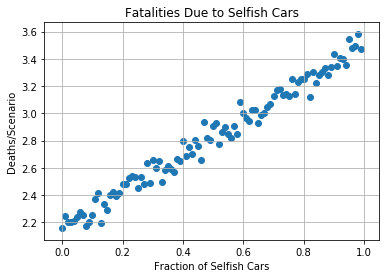

In [103]:
import random
from matplotlib.pyplot import *

x=[]
y=[]
s = av.Scenario()
pct_selfish=1
for fract in range(100):  # fraction of selfish cars
    total_dead = 0
    for i in range(1000): # 1000 trials per fraction.
        s.randomize()
        if random.randint(1,100) < pct_selfish:   # Pick selfish or utilitarian with right fraction.
            if (selfish_car(s) == "Stay"):
                total_dead=total_dead + num_fatalities("Left", s)
            else: 
                total_dead=total_dead + num_fatalities("Right", s)
        else:
            if (utilitarian_car(s) == "Stay"):
                total_dead=total_dead + num_fatalities("Left", s)
            else: 
                total_dead=total_dead + num_fatalities("Right", s)
                
    x.append(fract/100)
    y.append(total_dead/1000)
    
    pct_selfish = pct_selfish+1
    
# Generate a plot of the x and y values.
scatter(x, y,)                           # plot x and y.
title("Fatalities Due to Selfish Cars")  # Title for the plot.
xlabel("Fraction of Selfish Cars")       # Label the x axis.
ylabel("Deaths/Scenario")                # Label the y axis.
grid(True)                               # Turn on the grid lines.
show()                                   # Make the graph show up in the notebook.

**Q27:** Using evidence provided by results from the questions above explain which type of car would provide the most benefit to society as a whole?

The graph above illustrates a direct relationship between the fraction of selfish cars on the road and the number of fatalities.  That is as the number of selfish cars goes up, relative to utilitarian cars, the number of deaths also goes up.  Thus, it seems that having more utilitarian cars on the road would provide the most benefit to society as a whole.  

**Q28:** Now consider not car/pedestrian interactions but car/car interactions. Do you think you would individually be safer in a selfish car or a utilitarian car?  Does your answer change if everyone else makes the same choice as you?  Explain.

Initially the thought is that I would be safer in a selfish car. This seems true from a "me" centric view, my car will protect me.  However, if everyone else has made the same decision, their cars will be protecting them also. So if everyone is driving selfish cars then I will be more likely to be targeted by someone else's car in its efforts to protect them. As the graph then shows, if I am involved in an accident, the more selfish cars there are the more likely I will be to be killed (or harmed).  Thus, it seems that I would be safer in a utilitarian car, assuming everyone else made the same decision as me. 

**Q29:** Based on the above, who do you believe should decide a car's ethics (individual, government, manufacturers)?  Why?

_Individual answers will vary._

### Additional Information

If you found the content of this lab interesting, you may also be interested in a TEDx talk on [The Social Dilemma of Driverless Cars](http://www.youtube.com/watch?v=nhCh1pBsS80) by the researcher who conducted the study discussed in the article above.  

[![TEDx Talk on The Social Dilemma of Driverless Cars](http://img.youtube.com/vi/nhCh1pBsS80/0.jpg)](http://www.youtube.com/watch?v=nhCh1pBsS80)

If you are interested in all of the details of the study you can read the full report on [The Social Dilemma of Driverless Cars](https://science.sciencemag.org/content/352/6293/1573) in Science magazine.

If you are interested in some of the more technical details of how driverless cars work the New York Times has a nice article on [How Driverless Cars See the World Around Them](https://www.nytimes.com/2018/03/19/technology/how-driverless-cars-work.html).

---

![Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png "Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License") All textual materials used in this course are licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/)

![GPL V3 or Later](https://www.gnu.org/graphics/gplv3-or-later-sm.png "GPL V3 or later") All executable code used in this course is licensed under the [GNU General Public License Version 3 or later](https://www.gnu.org/licenses/gpl.txt)